### github section

In [74]:
!git config --global user.email "tashifahmed518@gmail.com"
!git config --global user.name "Tash518"
!git config --list


filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=tashifahmed518@gmail.com
user.name=Tash518


In [85]:
%cd omr_project

/content/omr_project


In [88]:
!git init


Reinitialized existing Git repository in /content/omr_project/.git/


In [110]:
!git branch -M main


In [108]:
!git add --a


In [105]:
%cd /content/omr_project/

/content/omr_project


In [109]:
!git status

On branch main
nothing to commit, working tree clean


### main

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import cv2

In [2]:
print("TensorFlow version:", tf.__version__)
print("keras version", keras.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.19.0
keras version 3.10.0
Num GPUs Available: 1


In [3]:
ds,  ds_info = tfds.load('emnist/byclass', split=['train','test'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.AWPHW2_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.AWPHW2_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.


In [4]:
ds_train, ds_test = ds

In [5]:
NUM_CLASS = ds_info.features['label'].num_classes

#preprocessing
def preprocess(image,label):
  image = tf.cast(image,tf.float32)/255        #normaize
  if tf.rank(image)<3:
    image = tf.expand_dims(image,-1)          #add color channel if not there already
  image = tf.image.transpose(image)      # swap x and y axes
  image = tf.image.flip_left_right(image)  # mirror horizontally

  image.set_shape([28,28,1])           #explicityy set shape if needed
  return (image, label)

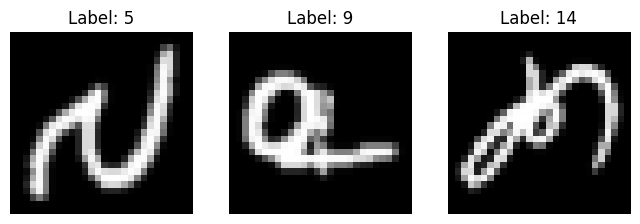

In [6]:
samples = list(ds_train.take(3))

plt.figure(figsize=(8, 3))
for i, (image, label) in enumerate(samples):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")

plt.show()

will try to make list for rcnn


In [17]:
class_names = ['0','1','2','3','4','5','6','7','8','9',
               'A','B','C','D','E','F','G','H','I','J',
               'K','L','M','N','O','P','Q','R','S','T',
               'U','V','W','X','Y','Z',
               'a','b','c','d','e','f','g','h','i','j',
               'k','l','m','n','o','p','q','r','s','t',
               'u','v','w','x','y','z']

In [23]:
len(ds_test)

116323

In [46]:
emnist_cache = {i: [] for i in range(NUM_CLASS)}
count = 0
class_lim=10
for image,label in ds_train.take(100):
  image_squeezed = image.numpy().squeeze()
  label_i = int(label.numpy())
  if len(emnist_cache[label_i]) <= class_lim:
    emnist_cache[label_i].append(image_squeezed)
  if count >= 100:
    break
  #to make sure no class is empty because index erro ris retarded
  for j in range(NUM_CLASS):
    if ( len(emnist_cache[j])==0):
      emnist_cache[j].append(np.zeros((28,28)))
  count += 1


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])
o
U
2
0:0->11
1:1->7
2:2->5
3:3->7
4:4->3
6:6->6
7:7->7
8:8->7
9:9->8
14:E->3
15:F->3
16:G->2
17:H->2
18:I->3
19:J->2
21:L->2
23:N->2
24:O->3
26:Q->2
30:U->2
31:V->2
32:W->2
33:X->2
34:Y->3
35:Z->3
36:a->4
37:b->3
38:c->2
39:d->4
40:e->4
42:g->2
43:h->3
47:l->2
49:n->3
52:q->3
53:r->2
55:t->2
57:v->3
59:x->2


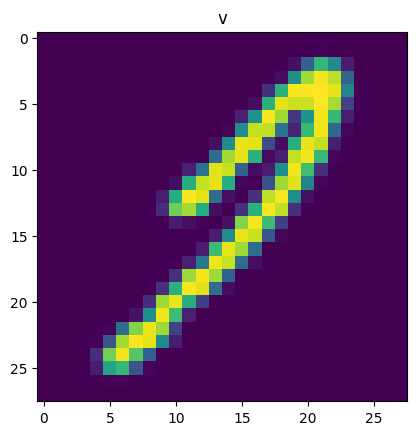

In [68]:
print(emnist_cache.keys())
print(class_names[50])
label = 30

print(class_names[label])
print(len(emnist_cache[label]))
for i, j in emnist_cache.items():
  if(len(j)>1):
    print(f"{i}:{class_names[i]}->{len(j)}")
plt.imshow(emnist_cache[57][1])
plt.title(class_names[57])
plt.show()

rcnn end

In [ ]:
train_ds = ds_train.map(preprocess).shuffle(10000).batch(128)
test_ds = ds_test.map(preprocess).batch(128)
print(train_ds)
print(test_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


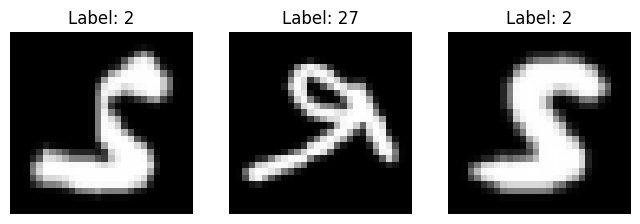

In [ ]:
for images, labels in train_ds.take(1):
    images = images.numpy()
    labels = labels.numpy()
    plt.figure(figsize=(8, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
    plt.imshow(images[i].squeeze(), cmap="gray")  # squeeze for single channel
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.show()

#preprocessiing

* the shape of the images and labels is expected

* idek why the batched dataset shape isnt matching


* Conv2D(32, (3,3))	Detects basic features like edges
* MaxPooling2D((2,2))	Reduces spatial size, downsampling
* Conv2D(64, (3,3))	Detects more complex features
* MaxPooling2D((2,2))	Further downsamples, reduces computation
* Flatten()	Converts 3D feature map into 1D vector
* Dense(64)	Fully connected layer for learning patterns
* Dense(NUM_CLASS)	Final output: 62 classes → softmax gives class probabilitie

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(NUM_CLASS,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)
for images, labels in test_ds.take(1):
    print(images.shape)
    print(labels.shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         4,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,310 (489.49 KB)

 Trainable params: 125,310 (489.49 KB)

 Non-trainable params: 0 (0.00 B)

(128, 28, 28, 1)
(128,)
(128, 28, 28, 1)
(128,)


In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 118s 21ms/step - accuracy: 0.7620 - loss: 0.7970 - val_accuracy: 0.8483 - val_loss: 0.4263
Epoch 2/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 110s 20ms/step - accuracy: 0.8516 - loss: 0.4175 - val_accuracy: 0.8546 - val_loss: 0.3974
Epoch 3/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 111s 20ms/step - accuracy: 0.8599 - loss: 0.3852 - val_accuracy: 0.8594 - val_loss: 0.3800
Epoch 4/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 141s 20ms/step - accuracy: 0.8651 - loss: 0.3675 - val_accuracy: 0.8632 - val_loss: 0.3736
Epoch 5/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 118s 21ms/step - accuracy: 0.8681 - loss: 0.3557 - val_accuracy: 0.8625 - val_loss: 0.3709
Epoch 6/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 119s 22ms/step - accuracy: 0.8703 - loss: 0.3472 - val_accuracy: 0.8641 - val_loss: 0.3697
Epoch 7/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 116s 21ms/step - accuracy: 0.8722 - loss: 0.3409 - val_accuracy: 0.8646 - val_loss: 0.3708
Epoch 8/10
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 116s 21ms/step - accuracy: 

In [ ]:
results = model.evaluate(test_ds)
print("Test results (loss, accuracy):", results)

909/909 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8622 - loss: 0.3770
Test results (loss, accuracy): [0.377856582403183, 0.8624089956283569]


In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9',
               'A','B','C','D','E','F','G','H','I','J',
               'K','L','M','N','O','P','Q','R','S','T',
               'U','V','W','X','Y','Z',
               'a','b','c','d','e','f','g','h','i','j',
               'k','l','m','n','o','p','q','r','s','t',
               'u','v','w','x','y','z']

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  


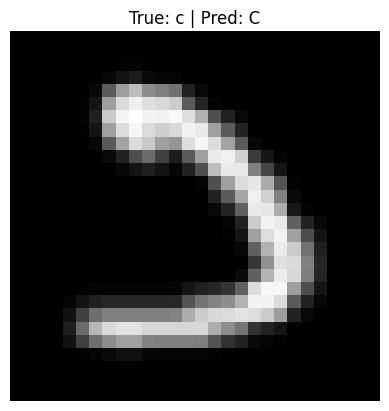

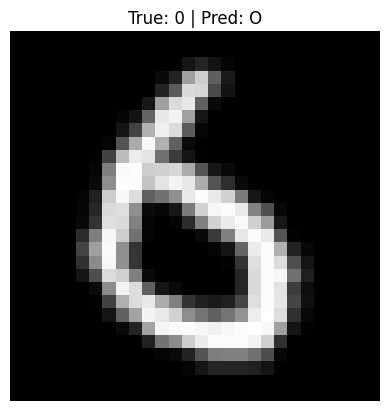

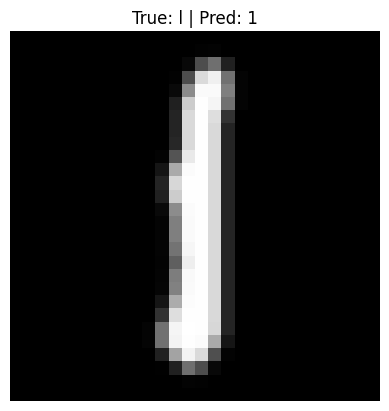

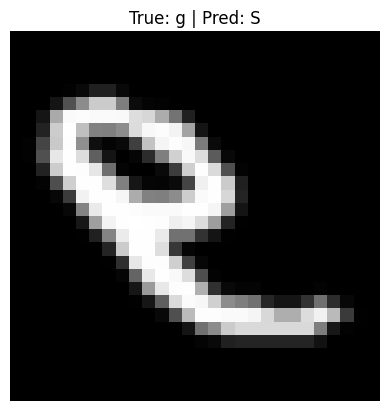

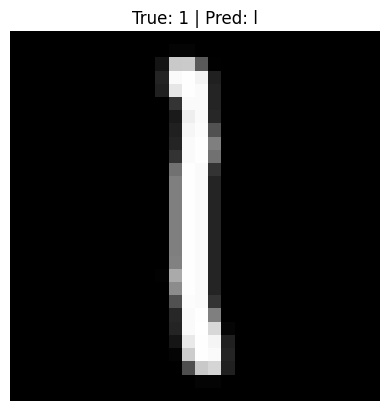

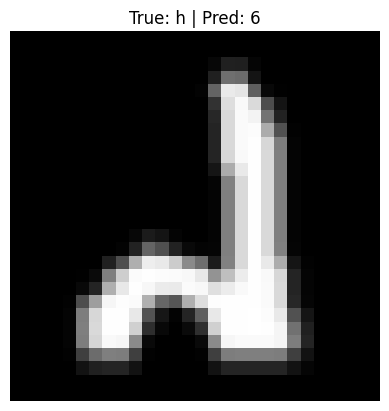

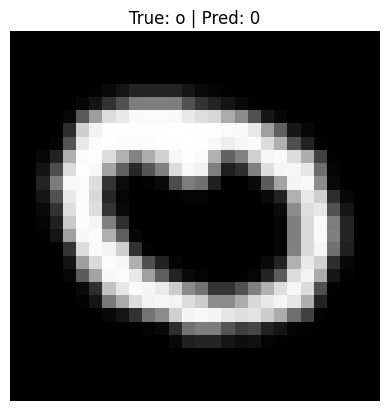

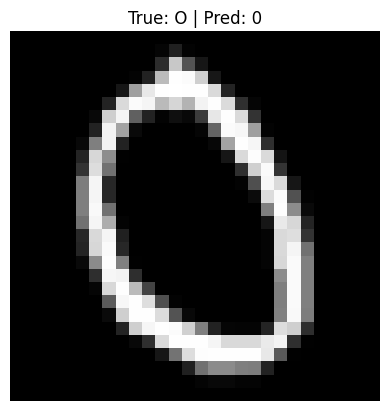

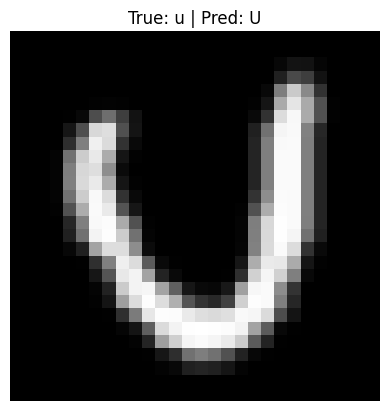

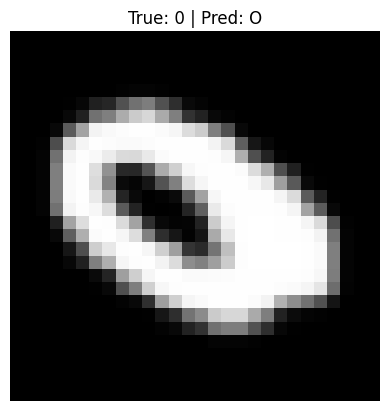

[  9  33  36  45  51  63  69  81  93  95  99 100 101 103 108 113]


In [ ]:
for images, label in test_ds.take(1):
  pred = model.predict(images)
  pred_labels = np.argmax(pred, axis=1)
  wrong_idx = np.where(pred_labels != labels.numpy())[0]
  for i in wrong_idx[:10]:  # Show first 10 mistakes
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.title(f"True: {class_names[labels[i]]} | Pred: {class_names[pred_labels[i]]}")
    plt.axis('off')
    plt.show()
print(wrong_idx)


